In [1]:
import numpy as np
import pandas as pd
import pickle

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
import numpy as np
import torchvision
from torch.utils.data import DataLoader, Dataset
from torch.utils.data.sampler import SubsetRandomSampler
from torch.backends import cudnn

from sklearn import manifold
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

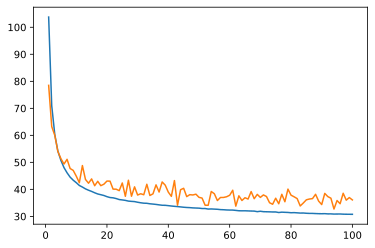

In [2]:
# Draw the traning process
with open('data/LossRecord2.pickle', 'rb') as f:
    LossRecord = pickle.load(f)

x = list(range(1,len(LossRecord)+1))
y1 = np.array(LossRecord)[:,0]
y2 = np.array(LossRecord)[:,1]
plt.plot(x,y1,x,y2)

In [3]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        
        # define the embedding
        self.id = nn.Embedding(100, 10)
        self.year = nn.Embedding(3, 2)
        self.month = nn.Embedding(12, 6)
        self.day = nn.Embedding(31, 10)
        self.hour = nn.Embedding(24, 10)
        self.dayofweek = nn.Embedding(7, 3)
        self.aqi = nn.Embedding(281, 12)
        self.humidity = nn.Embedding(81, 10)
        self.temp = nn.Embedding(46, 10)
        self.weather = nn.Embedding(13, 6)
        self.wind = nn.Embedding(9, 5)
        self.winp = nn.Embedding(10, 5)
        self.holiday = nn.Embedding(10, 6)
        self.surrounding = nn.Embedding(8, 3)
        
        # nn layers
        self.linear = nn.Linear(98, 2048)
        self.linear2 = nn.Linear(2048, 1024)
        self.linear3 = nn.Linear(1024, 1)
        self.droplow = nn.Dropout3d(0.2)
        self.dropmid = nn.Dropout3d(0.5)
        self.drophigh = nn.Dropout3d(0.7)
        self.bnl1 = nn.BatchNorm1d(2048)
        self.bnl2 = nn.BatchNorm1d(1024)
        # nn.GRU()
        
    def forward(self, x):
        
        in_size = x.size(0)
        
        e_id = self.id(x[:,0])
        e_year = self.year(x[:,1])
        e_month = self.month(x[:,2])
        e_day = self.day(x[:,3])
        e_hour = self.hour(x[:,4])
        e_dayofweek = self.dayofweek(x[:,5])
        e_aqi = self.aqi(x[:,6])
        e_humidity = self.humidity(x[:,7])
        e_temp = self.temp(x[:,8])
        e_weather = self.weather(x[:,9])
        e_wind = self.wind(x[:,10])
        e_winp = self.winp(x[:,11])
        e_holiday = self.holiday(x[:,12])
        e_surrounding = self.surrounding(x[:,13])
        
        x = F.relu(torch.cat((e_id,e_year,e_month,e_day,e_hour,e_dayofweek,e_aqi,
                  e_humidity,e_temp,e_weather,e_wind,e_winp,e_holiday,e_surrounding), dim=1))
        
        x = F.relu(self.linear(x))
        x = self.dropmid(x)
        x = F.relu(self.linear2(x))
        x = self.dropmid(x)
        x = self.linear3(x)
        x = x.view(in_size)
        
        return x

model = Model() # construct a new model
model.load_state_dict(torch.load('data/model2_state.pt'))

<All keys matched successfully>

In [4]:
with open('data/les.pickle', 'rb') as f:
    les = pickle.load(f)
les

C:\Anaconda3\lib\site-packages\sklearn\base.py:306: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.19.1 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


{'id': LabelEncoder(),
 'year': LabelEncoder(),
 'month': LabelEncoder(),
 'day': LabelEncoder(),
 'hour': LabelEncoder(),
 'dayofweek': LabelEncoder(),
 'aqi': LabelEncoder(),
 'humidity': LabelEncoder(),
 'temp': LabelEncoder(),
 'weather': LabelEncoder(),
 'wind': LabelEncoder(),
 'winp': LabelEncoder(),
 'holiday': LabelEncoder(),
 'surrounding': LabelEncoder()}

In [5]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签 
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

id


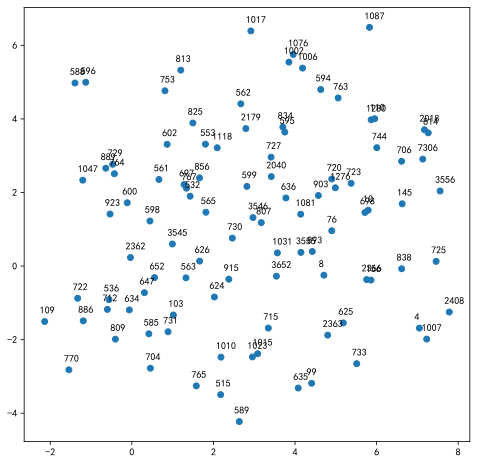

year


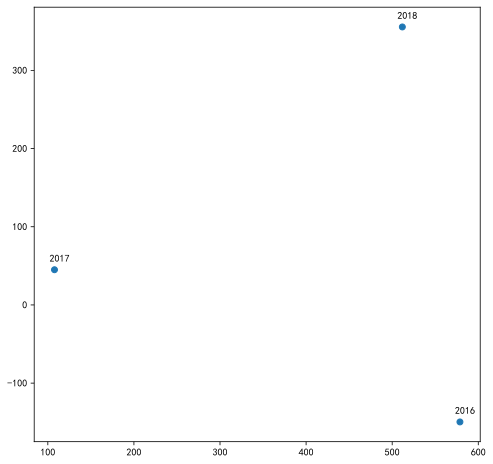

month


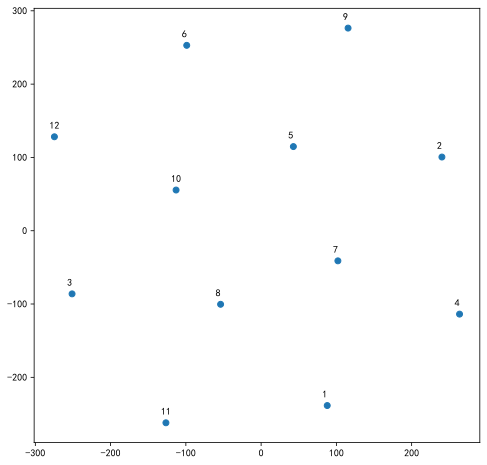

day


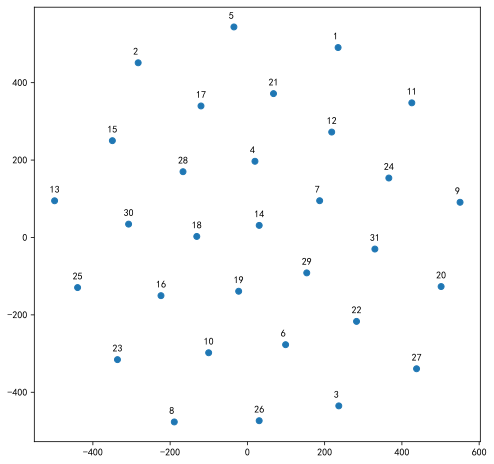

hour


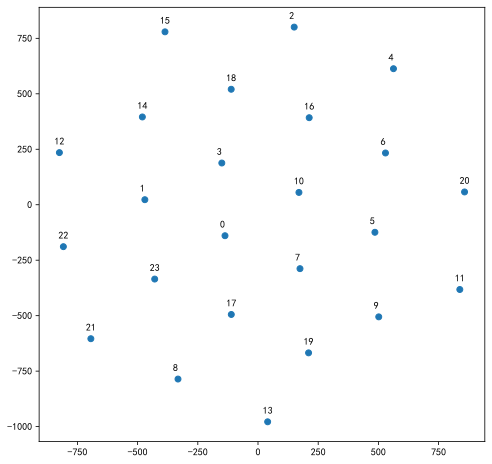

dayofweek


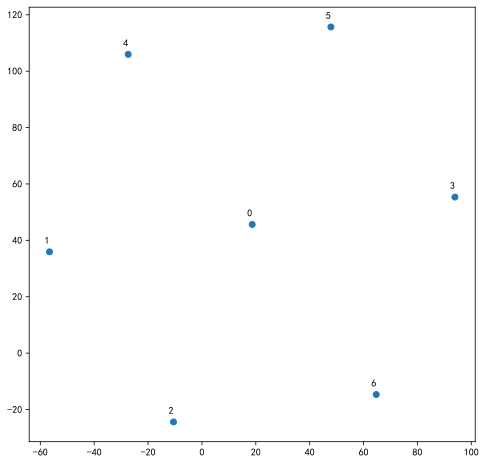

aqi


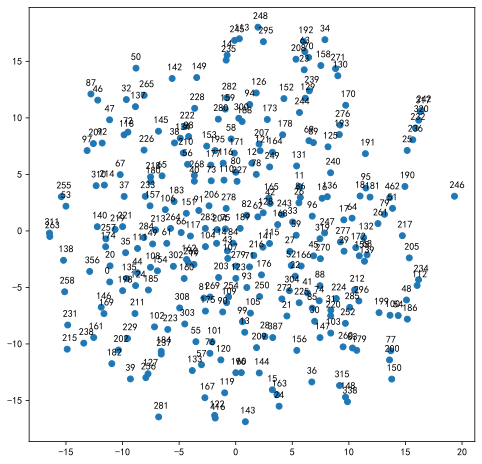

humidity


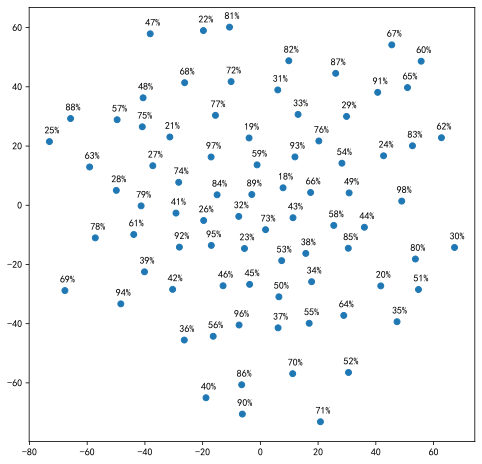

temp


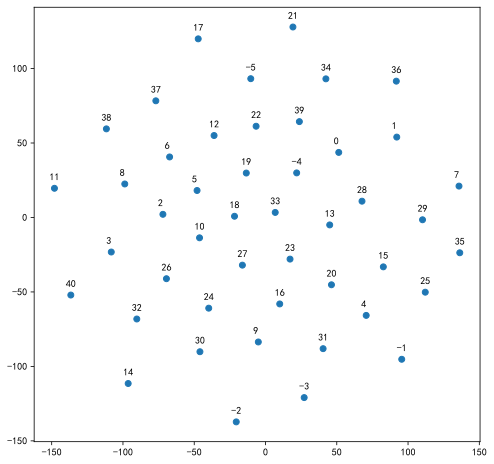

weather


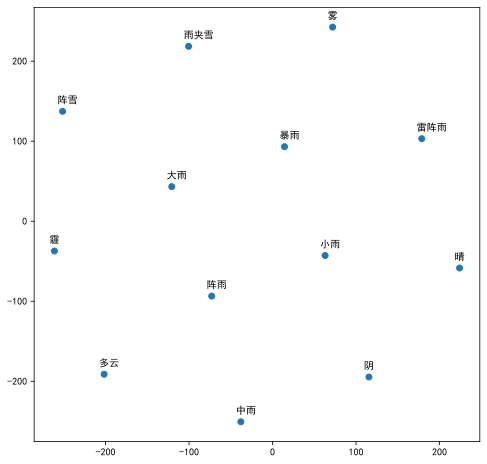

wind


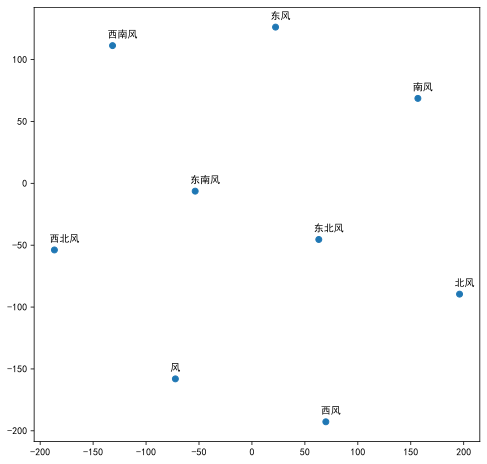

winp


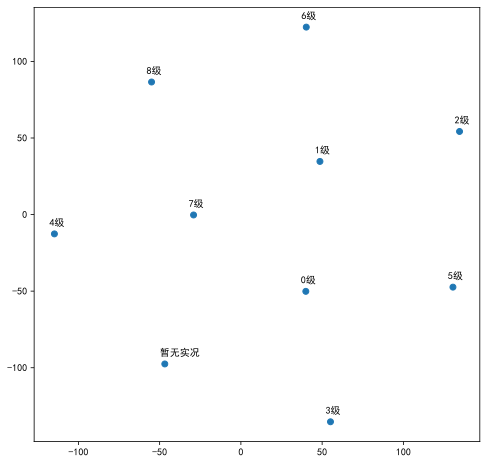

holiday


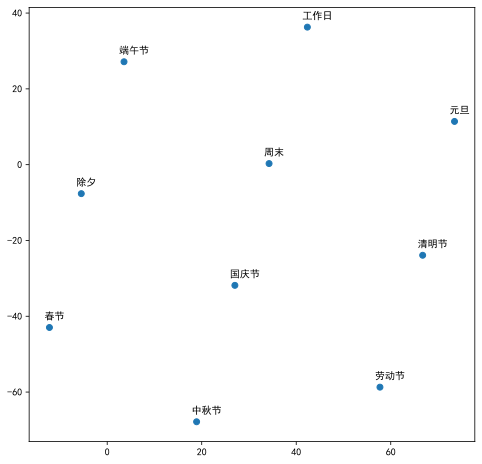

surrounding


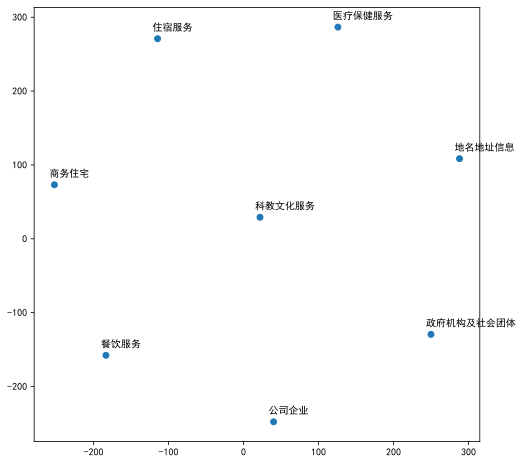

In [6]:
for index, key in enumerate(les):
    print(key)
    
    embedding = list(model.parameters())[index].cpu().data.numpy()
    embedding.shape

    tsne = manifold.TSNE(init='pca', random_state=0, method='exact')
    Y = tsne.fit_transform(embedding)

    names = list(les[key].classes_)

    plt.figure(figsize=(8,8))
    plt.scatter(-Y[:, 0], -Y[:, 1])
    for i, txt in enumerate(names):
        plt.annotate(txt, (-Y[i, 0],-Y[i, 1]), xytext = (-5, 8), textcoords = 'offset points')
        
    plt.show()

In [ ]:
## id ##
embedding = list(model.parameters())[0].cpu().data.numpy()
embedding.shape

tsne = manifold.TSNE(init='pca', random_state=0, method='exact', perplexity=10)
Y = tsne.fit_transform(embedding)

names = list(les['id'].classes_)

plt.figure(figsize=(8,8))
plt.scatter(-Y[:, 0], -Y[:, 1])
for i, txt in enumerate(names):
    plt.annotate(txt, (-Y[i, 0],-Y[i, 1]), xytext = (-5, 8), textcoords = 'offset points')
# plt.savefig('embedding.svg')

In [ ]:
## year ##
embedding = list(model.parameters())[1].cpu().data.numpy()
embedding.shape

tsne = manifold.TSNE(init='pca', random_state=0, method='exact', perplexity=2)
Y = tsne.fit_transform(embedding)

names = list(les['year'].classes_)

plt.figure(figsize=(8,8))
plt.scatter(-Y[:, 0], -Y[:, 1])
for i, txt in enumerate(names):
    plt.annotate(txt, (-Y[i, 0],-Y[i, 1]), xytext = (-5, 8), textcoords = 'offset points')
# plt.savefig('embedding.svg')

In [ ]:
## month ##
embedding = list(model.parameters())[2].cpu().data.numpy()
embedding.shape

tsne = manifold.TSNE(init='pca', random_state=0, method='exact', perplexity=4, n_iter=5000)
Y = tsne.fit_transform(embedding)

names = list(les['month'].classes_)
print(names)
names = ['January','February','March','April','May','June','July','August','September','October','November','December']

plt.figure(figsize=(8,8))
plt.scatter(-Y[:, 0], -Y[:, 1])
for i, txt in enumerate(names):
    plt.annotate(txt, (-Y[i, 0],-Y[i, 1]), xytext = (-12, 8), textcoords = 'offset pixels')
# plt.savefig('embedding.svg')

In [ ]:
## hour ##

hour_embedding = list(model.parameters())[4].cpu().data.numpy()
hour_embedding.shape

tsne = manifold.TSNE(init='pca', random_state=0, method='exact', perplexity=5)
Y = tsne.fit_transform(hour_embedding)

names = list(les['hour'].classes_)

plt.figure(figsize=(8,8))
plt.scatter(-Y[:, 0], -Y[:, 1])
for i, txt in enumerate(names):
    plt.annotate(txt, (-Y[i, 0],-Y[i, 1]), xytext = (-5, 8), textcoords = 'offset points')
# plt.savefig('hour_embedding.svg')

In [ ]:
## su ##

hour_embedding = list(model.parameters())[13].cpu().data.numpy()
hour_embedding.shape

tsne = manifold.TSNE(init='pca', random_state=0, method='exact', perplexity=3, n_iter=5000)
Y = tsne.fit_transform(hour_embedding)

names = list(les['surrounding'].classes_)

plt.figure(figsize=(8,8))
plt.scatter(-Y[:, 0], -Y[:, 1])
for i, txt in enumerate(names):
    plt.annotate(txt, (-Y[i, 0],-Y[i, 1]), xytext = (-5, 8), textcoords = 'offset points')
# plt.savefig('hour_embedding.svg')